In [ ]:
# Probando pyunicorn alteranive

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from pyunicorn import climate,core

In [26]:
s = Dataset("MeanMontlyTem_ERA-In1982-2017.nc")
s.variables#["p55.162"][:]

OrderedDict([(u'longitude', <type 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  units: degrees_east
                  long_name: longitude
              unlimited dimensions: 
              current shape = (144,)
              filling off), (u'latitude', <type 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  units: degrees_north
                  long_name: latitude
              unlimited dimensions: 
              current shape = (73,)
              filling off), (u'level', <type 'netCDF4._netCDF4.Variable'>
              int32 level(level)
                  units: millibars
                  long_name: pressure_level
              unlimited dimensions: 
              current shape = (9,)
              filling off), (u'time', <type 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: hours since 1900-01-01 00:00:0.0
                  long_name: time
                  cal

In [5]:
file_name = "MeanMontlyTem_ERA-In1982-2017.nc"#TempMeanMontlyDetre_ERA-In1981-2017_5x5.nc"#DetrendEMD_TempStr_ERA-In1981-2017_5x5.nc"
observable_name = "t"
time_cycle = 12
LINK = 0.05
THRESHOLD = 0.5

Data = climate.ClimateData.Load(file_name=file_name, observable_name=observable_name,
time_cycle=time_cycle, latitude_name="latitude",data_source="reanalysis",
longitude_name="longitude",time_name="time",file_type='NetCDF',vertical_level=8)

data = Data.observable()
#data.shape
n_times, n_index = data.shape
n_times, n_index

net = climate.mutual_info.MutualInfoClimateNetwork(Data,link_density=LINK, winter_only=False)

degree = net.degree()
print degree

degree_all = degree.reshape(73,144)

Reading NetCDF File and converting data to NumPy array...
Generating a mutual information climate network...
Calculating daily (monthly) anomaly values...
Loading mutual information matrix from mutual_information_reanalysis_t.data...
An error occured while loading data from mutual_information_reanalysis_t.data.
Recalculating mutual information.
Calculating mutual information matrix at zero lag from anomaly values using Weave...
Done!
Either threshold or link_density have to be prescribed for network construction!


AttributeError: 'MutualInfoClimateNetwork' object has no attribute 'sp_A'

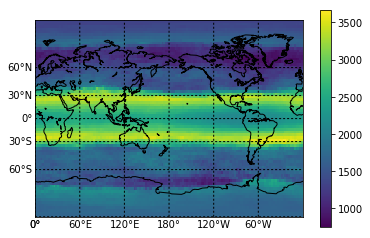

In [3]:
from mpl_toolkits.basemap import Basemap

map=Basemap(llcrnrlon=0,llcrnrlat=-90,urcrnrlon=360,urcrnrlat=90,projection='mill') 

map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])

#plt.scatter()
#figura = np.ma.masked_invalid(PW[23,:,:])
#figura = np.ma.masked_invalid(PW[4,:,:])

cmap=plt.get_cmap()
cmap.set_bad(color="w")
map.imshow(degree_all,cmap=cmap)
#plt.savefig("PW.png")
plt.colorbar()
 
plt.show()

In [4]:
"""
map_plots = climate.MapPlots(Data.grid, "ncep_ncar_reanalysis")
map_plots.add_dataset("Degree", degree)

map_plots.resources.mpProjection = "Robinson"
map_plots.resources.mpCenterLonF = 0

#  Change the levels of contouring
map_plots.resources.cnLevelSelectionMode = "EqualSpacedLevels"
map_plots.resources.cnMaxLevelCount = 20

# map_plots.resources.cnRasterSmoothingOn = True
# map_plots.resources.cnFillMode = "AreaFill"

map_plots.generate_map_plots(file_name="degree",
                             title_on=False, labels_on=True)
"""

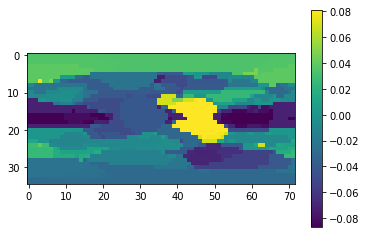

In [10]:
plt.imshow(s.variables["Temperature"][50,:,:])
plt.colorbar()
plt.show()